# Main steps during ML research.

This notebook contains information about different approaches in machine laerning. 
How to deal with data, what descriptive statistics better to use depending on data, what tests use to estimate data distribution, behaviour depending on these results and approaches for proper data visualisation.

In [46]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Matplotlib settings
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'fantasy'  #'Times New Roman'
plt.rcParams['axes.labelsize'] = 1.5 * plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.8 * plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
plt.rcParams['xtick.labelsize'] = 1.5 * plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = 1.5 * plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = 1.5 * plt.rcParams['font.size']

Creation of additional features, which will be used by us further.

In [50]:
def make_bmi(height_inch, weight_pound):
    ''' Calculates BMI 
    '''
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

def weight_category(weight):
    ''' Calculates Weight type of person
    '''
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

## 1. First steps

1. Look on data: look through the features (categorical, quantitative, etc.)

Below we use \*\*kwargs and 
[pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) functions

In [51]:
path = os.path.join(os.getcwd(), 'data', 'weights_heights.csv')

def load_data(path, **kwargs):
    '''Loads data from file, and return dataframe.
    '''
    if not os.path.exists(path):
        raise Exception('Path: {0} does not exists'.format(path))
    return pd.read_csv(path, **kwargs)

try:
    df = load_data(path, sep=',', index_col='Index')
    df['BMI'] = df.apply(
        lambda row: make_bmi(row['Height'], row['Weight']), axis=1
    )
    df['weight_cat'] = df['Weight'].apply(weight_category)
    display(df.head())
except Exception as e:
    print('Error: ', str(e))

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2


2. Plot histograms of features distributions.
    - Try to determine distribution type of each feature
    - Look for outliers in data

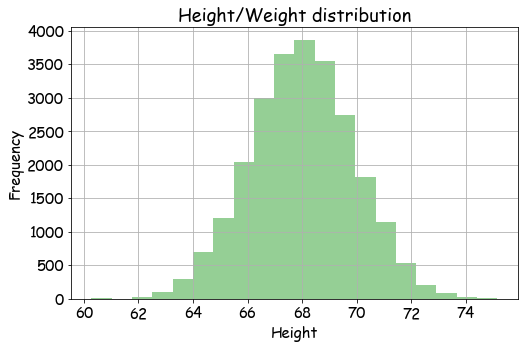

In [52]:
# Distribution by height
ax = df.Height.plot.hist(
    bins=20, alpha=0.5, grid=True, color='C2',
    title='Height/Weight distribution')
ax.set_xlabel('Height')
plt.show()

3. Plot scatter matrix for all features in dataset. We can use 
[sns.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function

P.S. Be carefull with this function for huge datasets, it could excecutes during really log period of time.

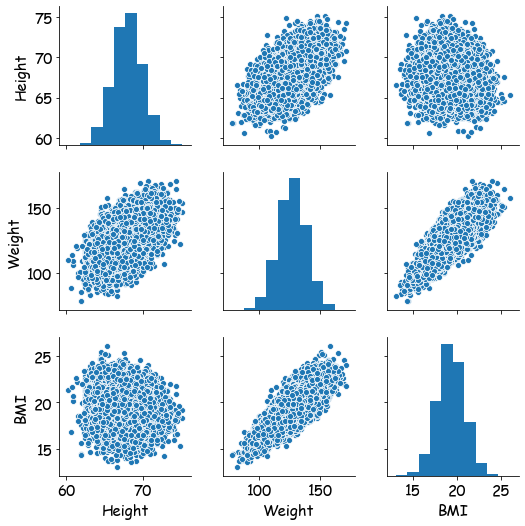

In [54]:
sns.pairplot(df, vars=df.columns.values[:-1])

4. Often, when we do analyse dependency of **quantitive** features from **categorical** feature we could use [sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html). This could help us in analysis of descriptive analysis of different categories.



More information about boxplots could be found [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

P.S. this could help to visuaise outliers in data.

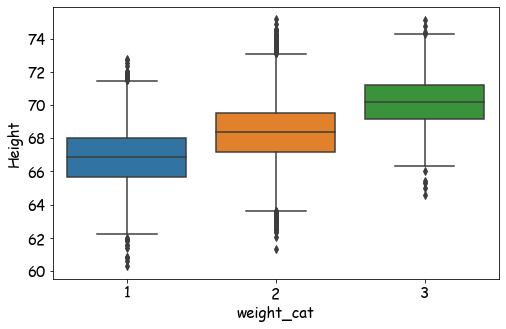

In [58]:
sns.boxplot(data=df, x='weight_cat', y = 'Height')